In [35]:
##Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Model

In [36]:
## Model
net = cv2.dnn.readNetFromDarknet('yolo/yolov3.cfg', 'yolo/yolov3.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)

In [37]:
## On recupere la liste de tous les objets detectables
objects_list = open('yolo/coco.names').read().strip().split('\n')

In [38]:
## Parametres
pm = 0.5  # proba min pour les prédictions
td = 0.3  # seuil pour le "non maximum suppression"

In [39]:
# Recuperation des couches YOLO du CNN
layers_yolo = [net.getLayerNames()[i-1] for i in net.getUnconnectedOutLayers()]

## Image

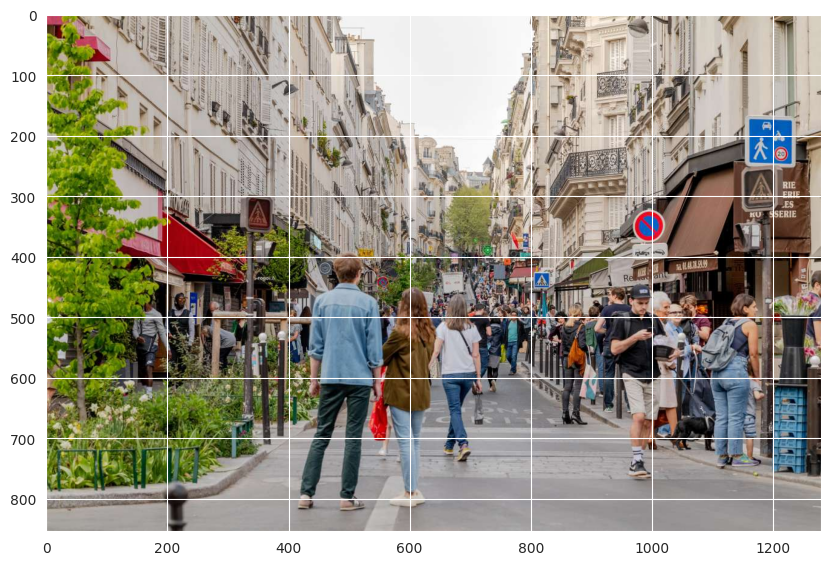

In [40]:
image_input = cv2.imread('yolo/rue.jpg')
image_input_shape = image_input.shape
h_dim = image_input.shape[0]
w_dim = image_input.shape[1]
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

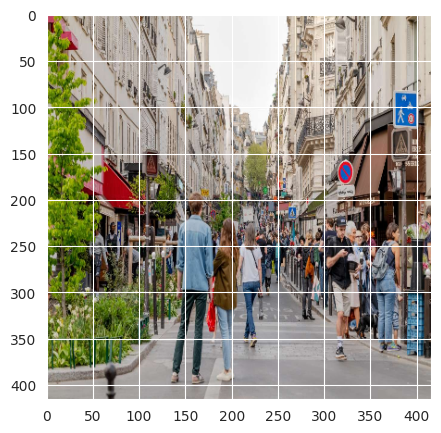

In [41]:
## Construction du blob
blob = cv2.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB=True, crop=False)
blob_img = blob[0, :, :, :].transpose(1, 2, 0)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.imshow(blob_img)
plt.show()

## Calcul

In [42]:
net.setInput(blob)
output = net.forward(layers_yolo)

In [43]:
##Generation des couleurs
colours = np.random.randint(0, 255, size=(len(objects_list), 3), dtype='uint8')

In [44]:
# Initialise les listes des sorties
bounding_boxes = []
confidences = []
classes = []

In [45]:
# Extrait les sorties du modèle
i = 0
for result in output:
    for detection in result:
        # Extrait la classe de l'objet et le score de confiance associé
        scores = detection[5:]
        clas = np.argmax(scores)
        confid = scores[clas]
        if confid > pm:
            # adapte les "bounding box" à la taille initiale de l'image
            box = detection[0:4] * np.array([w_dim, h_dim, w_dim, h_dim])
            x_center, y_center, box_width, box_height = box.astype('int')
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))
            # ajout aux listes des sorties
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confid))
            classes.append(clas)
        i += 1

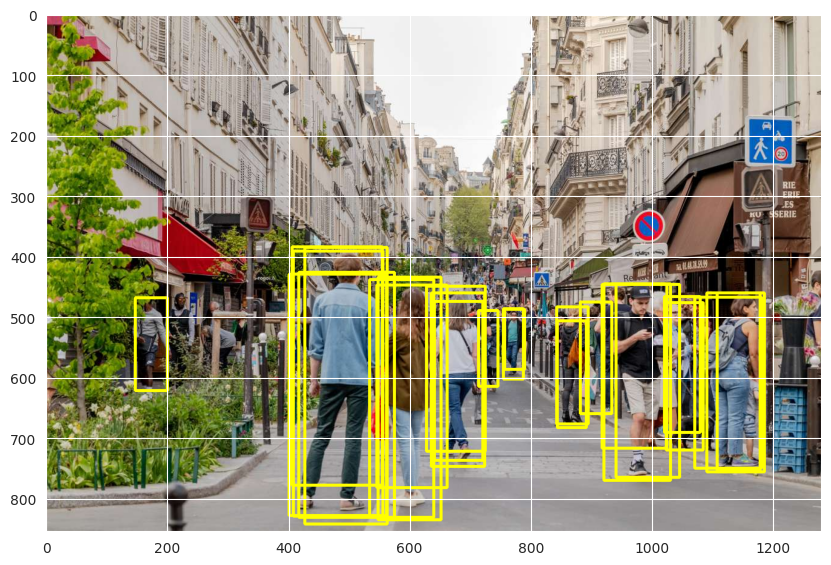

In [46]:
## On affiche toutes les bounding-boxes sur l'image
for bounding_boxe in bounding_boxes:
    x_min, y_min = bounding_boxe[0], bounding_boxe[1]
    box_width, box_height = bounding_boxe[2], bounding_boxe[3]
    cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height), (0, 255, 255), 3)
    %matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

In [47]:
## Non maximum suppression(elimination par seuillage)
results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, pm, td)

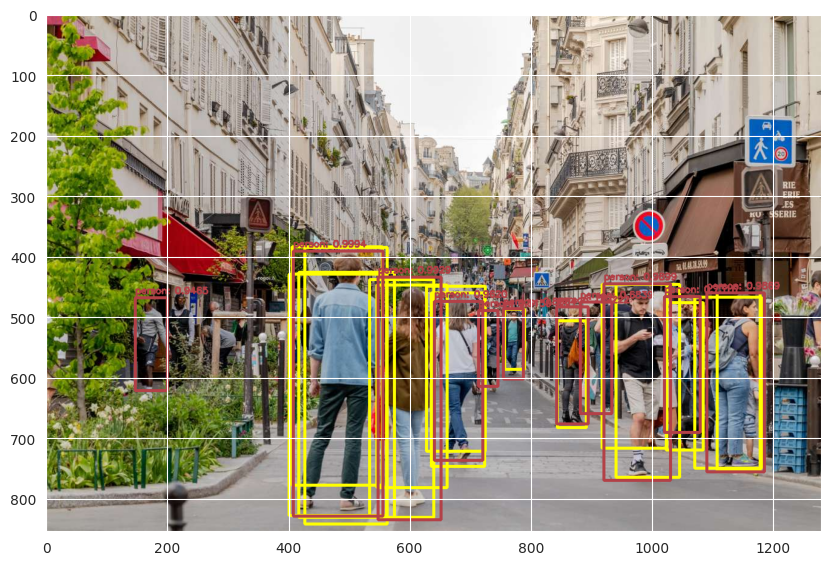

In [48]:
## On affiche les bounding-boxes sur l'image
if len(results) > 0:
    for i in results.flatten():
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]
        colour_box = [int(j) for j in colours[classes[i]]]
        cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height), colour_box, 3)
        text_box = '{}: {:.4f}'.format(objects_list[int(classes[i])], confidences[i])
        cv2.putText(image_input, text_box, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,0.5, colour_box, 2)
        %matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

## YOLO3 vs YOLO4 vs YOLO5 vs YOLO6 vs YOLO7

# Apprentissage nouveau type d'objet
### [lien](https://www.kaggle.com/code/ultralytics/yolov5)